***don't use this!***

Go check out [this repo](https://github.com/RZachLamberty/jspy_plotting) which uses flask for an implementation which is a bit more natural.

# JavaScript Charting Libraries

So, I often find myself needing to put some charts up on them webs. Which library should I use? Which is easiest to integrate with Python, say, and which requires me putting all that schnazz directly into js?

Let's just try a few out.

**note**: these tutorials are what I could find as of 2016-05-24

## Prep

just want to put together some data to graph later

In [98]:
%matplotlib inline

import matplotlib.pyplot as plt
import lxml
import lxml.etree
import lxml.html
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.display import HTML, display

In [99]:
eps = 0.1
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) + eps * np.random.randn(len(x))

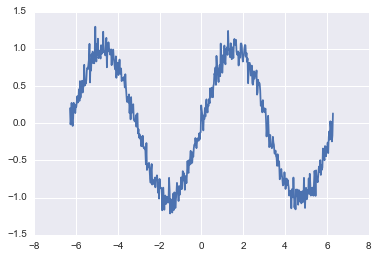

In [100]:
f = plt.figure()
a = f.add_subplot(111)
a.plot(x, y);

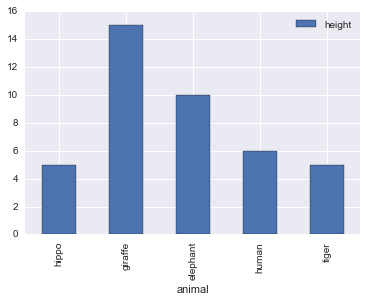

In [101]:
animals = ['hippo', 'giraffe', 'elephant', 'human', 'tiger']
height = [5, 15, 10, 6, 5]
numAnimals = {
    'sf': [5, 7, 2, 1, 4],
    'la': [6, 1, 4, 0, 8],
}
d = pd.DataFrame({'animal': animals, 'height': height, 'sf': numAnimals['sf'], 'la': numAnimals['la']})
d.plot.bar(x='animal', y='height');

## Plotly

Plotly has pretty tight integration with Python, obviously, but there is also `plotly.js` for web rendering.

There are a few things you could do

### offline render and display

I think this is a pretty weak option. Every time some one makes a call to your webpage, you re-render your plot and re-display it? Seems like a nightmare for multi-access apps. But anyway, here's how you do it:

In [102]:
import plotly
import plotly.graph_objs as go

line = go.Scatter(x=x, y=y, mode='lines+markers')

#### in a jupyter notebook

Ok, so, if you were in a notebook you didn't need to solve this problem. But here is the solution:

In [103]:
#plotly.offline.init_notebook_mode()

In [104]:
#plotly.offline.iplot({'data': [line], 'layout': {'title': 'hello world'}})

Well, that couldn't really be more underwhelming, now, could it?

#### regular offline plotting

In [105]:
plotly.offline.plot({'data': [line], 'layout': {'title': 'hello world'}})

'file:///Users/zach.lamberty/personal/notebooks/Zachademy/temp-plot.html'

You wanted that to pop open, right?

Well, at least this you can display in arbitrary html:

In [106]:
fname = plotly.offline.plot(
    {'data': [line], 'layout': {'title': 'hello world'}}, 
    auto_open=False
).replace('file://', '')

In [107]:
#with open(fname, 'r') as f:
#    display(HTML(f.read()))

Well that's a bummer... full html. Not going to be injected easily. I guess we could parse that ish...

In [108]:
#with open(fname, 'r') as f:
#    root = lxml.html.fromstring(f.read())
#display(HTML(lxml.etree.tostring(root.body).decode('utf-8')))

Well it was nice.
Let's just do this the sane way, then, instead

#### embedded javascript

In [109]:
import json
from IPython.display import Javascript

In [110]:
line = {
    'x': list(x),
    'y': list(y),
    'type': 'scatter',
    'mode': 'lines+markers',
}

j = json.dumps(line)

Javascript("""
window.visObj={};
""".format(j))

<IPython.core.display.Javascript object>

I tried about a million things here and nothing worked. Fuck it. It's easy when not in a notebook, see [this project](http://code.elderresearch.com/summary/gardener%2Frest_app_poc.git) for an example

## Highcharts

[Highcharts](http://jsfiddle.net/gh/get/jquery/1.9.1/highslide-software/highcharts.com/tree/master/samples/highcharts/demo/line-basic/) can't be worse than that shit...

In [92]:
%%javascript
require.config({
  paths: {
      jquery: 'http://ajax.googleapis.com/ajax/libs/jquery/2.2.2/jquery.min',
      d3: 'http://d3js.org/d3.v3.min',
      hchart: [
          'http://code.highcharts.com/highcharts',
          'http://code.highcharts.com/highcharts-more',
          'http://code.highcharts.com/modules/exporting'
      ]
  }
});

<IPython.core.display.Javascript object>

In [111]:
%%javascript
require(['d3'], function(d3){
    console.log('test');
})

<IPython.core.display.Javascript object>

In [112]:
%%javascript
element.append('<div id="container" style="width: 500px; height: 400px; margin: 0 auto"></div>');

<IPython.core.display.Javascript object>

In [113]:
%%javascript
require({
  paths: {
      jquery: 'http://ajax.googleapis.com/ajax/libs/jquery/2.2.2/jquery.min',
      hchart: [
          'http://code.highcharts.com/highcharts',
          'http://code.highcharts.com/highcharts-more',
          'http://code.highcharts.com/modules/exporting'
      ]
  }
},
['jquery', 'hchart'], function($, hc) {
    
    window.chart = new Highcharts.Chart({
                
        chart: {
            renderTo: 'mychart',
            polar: true,
            type: 'line'
        },
        
        title: {
            text: 'Budget vs spending',
            x: -80
        },
        
        pane: {
            size: '80%'
        },
        
        xAxis: {
            categories: ['Sales', 'Marketing', 'Development', 'Customer Support', 
                    'Information Technology', 'Administration'],
            tickmarkPlacement: 'on',
            lineWidth: 0
        },
            
        yAxis: {
            gridLineInterpolation: 'polygon',
            lineWidth: 0,
            min: 0
        },
        
        tooltip: {
            shared: true,
            valuePrefix: '$'
        },
        
        legend: {
            align: 'right',
            verticalAlign: 'top',
            y: 100,
            layout: 'vertical'
        },
        
        series: [{
            name: 'Allocated Budget',
            data: [43000, 19000, 60000, 35000, 17000, 10000],
            pointPlacement: 'on'
        }, {
            name: 'Actual Spending',
            data: [50000, 39000, 42000, 31000, 26000, 14000],
            pointPlacement: 'on'
        }]
    
    });
});

<IPython.core.display.Javascript object>

In [114]:
%%javascript
require(['jquery'], function(jq){
    console.log(jq('head'));
})

<IPython.core.display.Javascript object>

In [115]:
%%javascript
require(['jquery', 'hc1', 'hc2'], function($, highcharts, highcharts2) {
    element.append('<div id="mychart"></div>');
    $('#mychart').highcharts({
        title: {
            text: 'Monthly Average Temperature',
            x: -20 //center
        },
        subtitle: {
            text: 'Source: WorldClimate.com',
            x: -20
        },
        xAxis: {
            categories: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        },
        yAxis: {
            title: {
                text: 'Temperature (°C)'
            },
            plotLines: [{
                value: 0,
                width: 1,
                color: '#808080'
            }]
        },
        tooltip: {
            valueSuffix: '°C'
        },
        legend: {
            layout: 'vertical',
            align: 'right',
            verticalAlign: 'middle',
            borderWidth: 0
        },
        series: [{
            name: 'Tokyo',
            data: [7.0, 6.9, 9.5, 14.5, 18.2, 21.5, 25.2, 26.5, 23.3, 18.3, 13.9, 9.6]
        }, {
            name: 'New York',
            data: [-0.2, 0.8, 5.7, 11.3, 17.0, 22.0, 24.8, 24.1, 20.1, 14.1, 8.6, 2.5]
        }, {
            name: 'Berlin',
            data: [-0.9, 0.6, 3.5, 8.4, 13.5, 17.0, 18.6, 17.9, 14.3, 9.0, 3.9, 1.0]
        }, {
            name: 'London',
            data: [3.9, 4.2, 5.7, 8.5, 11.9, 15.2, 17.0, 16.6, 14.2, 10.3, 6.6, 4.8]
        }]
    });
});

<IPython.core.display.Javascript object>